In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer/sample_submission.csv
/kaggle/input/customer/Train.csv
/kaggle/input/customer/Test.csv


In [2]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [3]:
df = pd.read_csv('../input/customer/Train.csv')

In [4]:
df.sample(3)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
5091,465956,Male,Yes,39,Yes,Entertainment,4.0,Average,4.0,Cat_6,A
5224,459920,Female,Yes,51,Yes,Artist,6.0,High,2.0,Cat_4,B
7898,461386,Female,Yes,82,No,Lawyer,0.0,High,2.0,Cat_6,B


In [5]:
df.shape

(8068, 11)

In [6]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [7]:
for i in df.select_dtypes(include=np.number):
    df[i].fillna(df[i].mean(),inplace=True)

In [8]:
df['Ever_Married'].value_counts()

Yes    4643
No     3285
Name: Ever_Married, dtype: int64

In [9]:
df['Graduated'].value_counts()

Yes    4968
No     3022
Name: Graduated, dtype: int64

In [10]:
df['Profession'].value_counts()

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

In [11]:
df['Var_1'].value_counts()

Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64

In [12]:
df['Var_1'].fillna('Cat_6',inplace=True) # Cat_6 is dominant

In [13]:
df['Ever_Married'].fillna('Yes',inplace=True)
df['Profession'].fillna('Artist',inplace=True)
df['Graduated'].fillna('Yes',inplace=True)

In [14]:
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [15]:
x=pd.get_dummies(df,drop_first=True)

In [16]:
allscore=[]
allclusters=[]
sum_of_squared_distances = []
preds=[]
def clust(clusters,x):
    for no_of_cluster in np.arange(1,clusters):
        
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        pred=model.fit_predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score=silhouette_score(x,pred)
        print ("Number of cluster {}, silhouette {}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
        preds.append(pred)

In [17]:
clust(10,x)

Number of cluster 2, silhouette 0.6263169450446459
Number of cluster 3, silhouette 0.5917851417348282
Number of cluster 4, silhouette 0.5711737283119681
Number of cluster 5, silhouette 0.5590468356839685
Number of cluster 6, silhouette 0.5548000115481274
Number of cluster 7, silhouette 0.5463621892953862
Number of cluster 8, silhouette 0.541552007967957
Number of cluster 9, silhouette 0.5398506722918174
Number of cluster 10, silhouette 0.5364319450935062


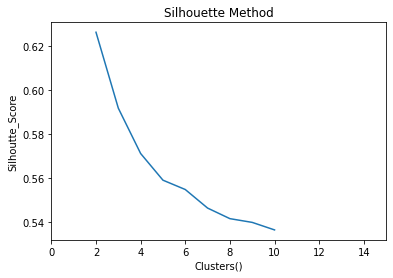

In [18]:
plt.plot(allclusters,allscore)
plt.xlabel('Clusters()')
plt.ylabel('Silhoutte_Score')
plt.title('Silhouette Method')
plt.xlim(0,15)
plt.show()

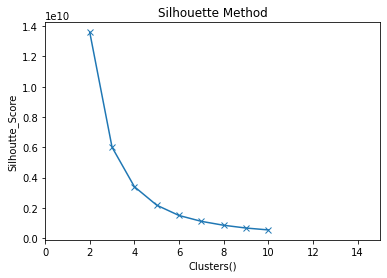

In [19]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('Clusters()')
plt.ylabel('Silhoutte_Score')
plt.title('Silhouette Method')
plt.xlim(0,15)
plt.show()

In [20]:
pred=preds[4]

In [21]:
result=pd.DataFrame()
result["ID"]=df["ID"]
result["Segmentation"]=df["Segmentation"]
result["Cluster"]=pred

In [22]:
len(pred)

8068

In [23]:
result

,ID,Segmentation,Cluster
0,462809,D,5
1,462643,A,5
2,466315,B,4
3,461735,B,1
4,462669,A,5
...,...,...,...
8063,464018,D,2
8064,464685,D,2
8065,465406,D,4
8066,467299,B,0


In [24]:
x

,ID,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Segmentation_B,Segmentation_C,Segmentation_D
0,462809,22,1.000000,4.0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
1,462643,38,2.641663,3.0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,466315,67,1.000000,1.0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
3,461735,67,0.000000,2.0,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0
4,462669,40,2.641663,6.0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,22,0.000000,7.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
8064,464685,35,3.000000,4.0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
8065,465406,33,1.000000,1.0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1
8066,467299,27,1.000000,4.0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0


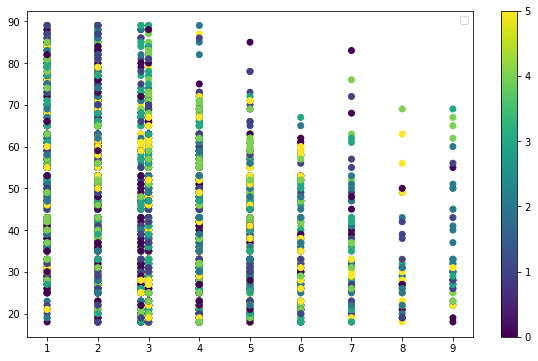

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(y=x["Age"],x=x["Family_Size"],c=pred)
plt.legend()
plt.colorbar()
plt.show()

In [26]:
sample=pd.read_csv('../input/customer/sample_submission.csv')
sample

,ID,Segmentation
0,458989,A
1,458994,A
2,458996,A
3,459000,A
4,459001,A
...,...,...
2622,467954,A
2623,467958,A
2624,467960,A
2625,467961,A
